In [1]:
library(readxl)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
student_data = read_excel("hsb2.xlsx")

race_labels = c("hispanic", "asian", "african-american", "white")
prog_labels = c("general","academic","vocational")

In [3]:
student_data = mutate(student_data, gender = factor(female, labels=c("M","F")),
         social_economic_group = factor(ses, labels=c("L","M","H")),
         race = factor(race, labels=race_labels),
         program = factor(prog, labels=prog_labels))

In [4]:
student_data = select(student_data, -female, -prog, -ses)

In [5]:
head(student_data)

id,race,schtyp,read,write,math,science,socst,gender,social_economic_group,program
70,white,1,57,52,41,47,57,M,L,general
121,white,1,68,59,53,63,61,F,M,vocational
86,white,1,44,33,54,58,31,M,H,general
141,white,1,63,44,47,53,56,M,H,vocational
172,white,1,47,52,57,53,61,M,M,academic
113,white,1,44,52,51,63,61,M,M,academic


In [27]:
table(student_data$race)


        hispanic            asian african-american            white 
              24               11               20              145 

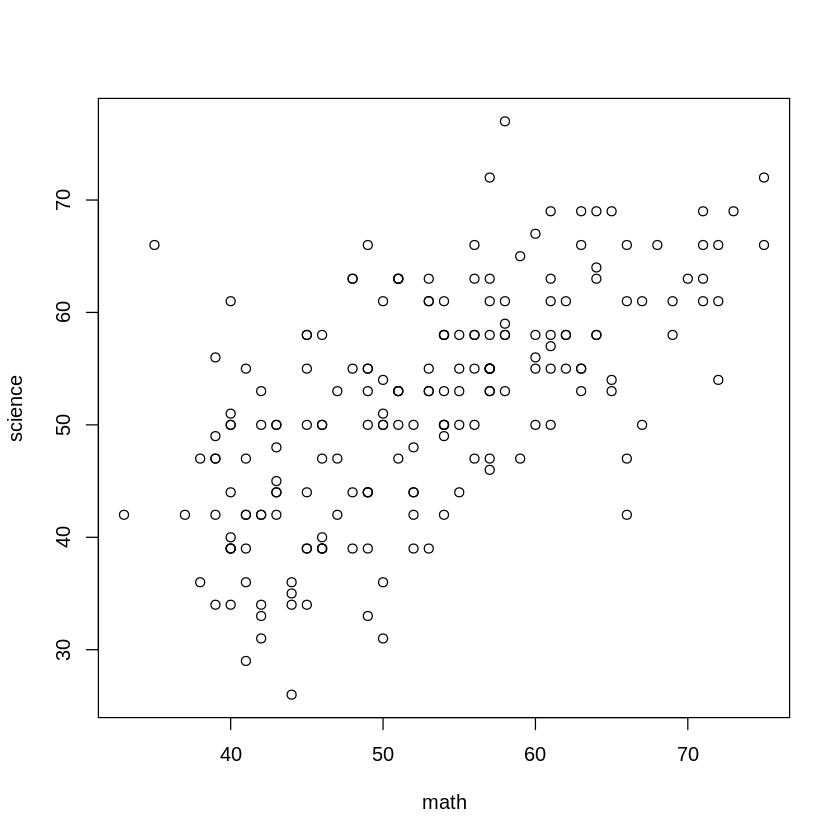

In [6]:
plot(science ~ math, data=student_data)

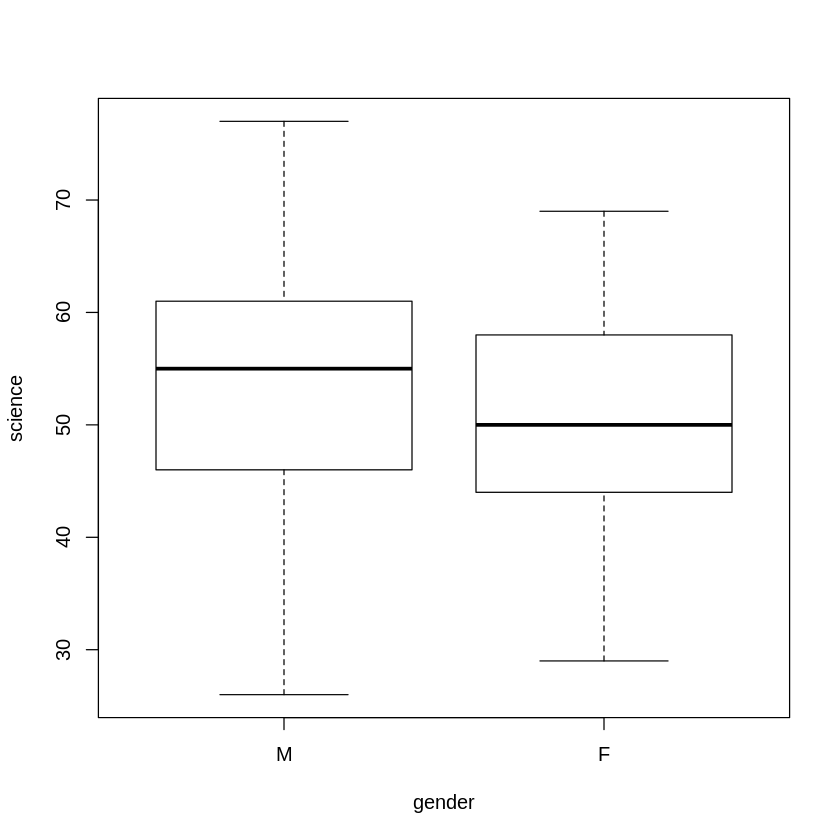

In [7]:
plot(science ~ gender, data=student_data)

In [8]:
model1 = lm(science~math,data=student_data)
summary(model1)


Call:
lm(formula = science ~ math, data = student_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0945  -4.7688  -0.0995   4.8880  25.9130 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.72447    3.13216    5.34 2.54e-07 ***
math         0.66750    0.05858   11.39  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.742 on 198 degrees of freedom
Multiple R-squared:  0.396,	Adjusted R-squared:  0.393 
F-statistic: 129.8 on 1 and 198 DF,  p-value: < 2.2e-16


#### The coefficient for math is 0.667 this means for each 1 mark increase in a students math score, we predict a 0.667 mark increase in science score. The formula to predict science score from math score is:

#### science = 16.72 + 0.667 * math

#### The Rsquared value is 0.396. This means the model accounts for 39.6% of the variance observed in the science scores.

In [9]:
model2 = lm(science ~ math + gender, data=student_data)
summary(model2)


Call:
lm(formula = science ~ math + gender, data = student_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3237  -4.3183   0.1518   4.4238  24.6528 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.10509    3.18269   5.689 4.58e-08 ***
math         0.66406    0.05816  11.418  < 2e-16 ***
genderF     -2.20088    1.09138  -2.017   0.0451 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.683 on 197 degrees of freedom
Multiple R-squared:  0.4083,	Adjusted R-squared:  0.4023 
F-statistic: 67.96 on 2 and 197 DF,  p-value: < 2.2e-16


The formula to predict science score from math and genderF variables is:

science = 18.10 + 0.664 * math + -2.20 * genderF

where genderF has a value of 1 for a female and 0 for a male.

The coefficient for math is 0.664 this means for each 1 mark increase in a students math score, we predict a 0.664 mark increase in science score.

The coefficient for genderF is -2.20 this means that for a given math score we predict a science score 2.2 marks lower if the student is female.

The Rsquared value is 0.4083. This means the model accounts for 40.8% of the variance observed in the science scores (slightly higher than the case with math score alone.)

## make aplot of science vs math and add fit lines for male and female:

An easy way to do this is to calculate the formula of the line of fit for males and females:

science = 18.10 + 0.664 * math + -2.20 * genderF

So for males (genderF=0):

science = 18.10 + 0.664 * math

intercept: 18.10 and slope: 0.664

So for females (genderF=1):

science = 18.10 + 0.664 * math + -2.20 = 16.90 + 0.664 * math intercept: 16.90 and slope: 0.664

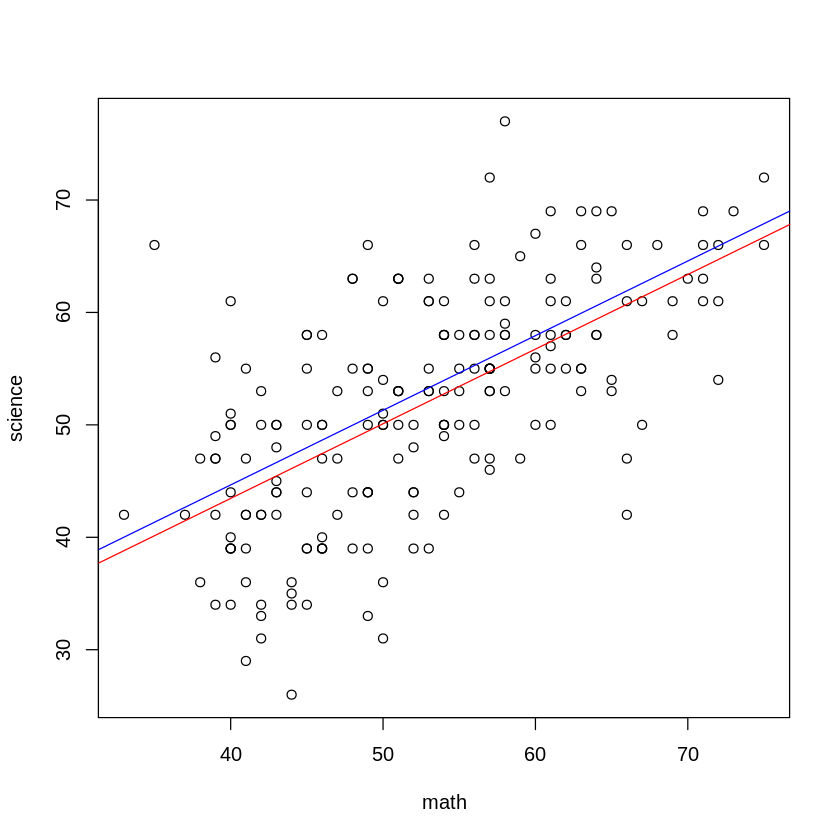

In [10]:
plot(science ~ math, data=student_data)
abline(a=18.10, b=0.664, col="blue")
abline(a=16.90, b=0.664, col="red")

In [11]:
model3 = lm(science ~ math + read + gender + race, data=student_data)
summary(model3)


Call:
lm(formula = science ~ math + read + gender + race, data = student_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4602  -4.4616  -0.4413   4.8618  19.5965 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          13.71372    3.14989   4.354 2.17e-05 ***
math                  0.36493    0.07161   5.096 8.24e-07 ***
read                  0.32537    0.06469   5.029 1.12e-06 ***
genderF              -1.80350    0.98985  -1.822  0.07000 .  
raceasian             1.26204    2.59041   0.487  0.62667    
raceafrican-american -2.02942    2.10001  -0.966  0.33506    
racewhite             4.22303    1.57619   2.679  0.00802 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.905 on 193 degrees of freedom
Multiple R-squared:  0.5316,	Adjusted R-squared:  0.5171 
F-statistic: 36.51 on 6 and 193 DF,  p-value: < 2.2e-16


### Race has been encoded as 3 dummy variables. Conasidering the race factors we see these correspond to the following:

hispanic:          raceasian=0, raceafrican-american=0, racewhite=0
asian:             raceasian=1, raceafrican-american=0, racewhite=0
african-american:  raceasian=0, raceafrican-american=0, racewhite=0
white:             raceasian=0, raceafrican-american=0, racewhite=0

### Therefore the baseline for race is hispanic and the coefficients on e.g. raceasian is the change in science grade predicted between a hispanic and asian student.

We could interpret this as expecting:

asian students            on average perform 1.26 marks higher than hispanic students

african-american students on average perform 2.02 marks lower  than hispanic students

white students            on average perform 4.22 marks higher than hispanic students

The significance levels tell us whether the result of a significance test comparing each coefficient with the null hypothesis that the true value is 0 (so there is no linear relationship between predictor and response.)

We see that we can only reject the null hypothesis for the math, read, racewhite coefficients at the 0.05 significance level.

In [21]:
model4 = lm(science ~ math + read + gender + race + write, data=student_data)
summary(model4)


Call:
lm(formula = science ~ math + read + gender + race + write, data = student_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8504  -4.4243   0.0971   4.4151  21.7187 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.40169    3.16325   3.288 0.001199 ** 
math                  0.26198    0.07420   3.531 0.000519 ***
read                  0.23495    0.06679   3.517 0.000544 ***
genderF              -3.29403    1.03215  -3.191 0.001654 ** 
raceasian            -0.10195    2.52791  -0.040 0.967873    
raceafrican-american -2.29129    2.03014  -1.129 0.260461    
racewhite             3.52102    1.53383   2.296 0.022781 *  
write                 0.28190    0.07341   3.840 0.000167 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.672 on 192 degrees of freedom
Multiple R-squared:  0.565,	Adjusted R-squared:  0.5492 
F-statistic: 35.63 on 7 and 192 DF,  p-value: < 2.2e-

In [16]:
anova(model3, model4)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
193,9203.207,NA,NA,NA,NA
192,8546.842,1,656.3655,14.74488,0.0001670655


The resulting F-statistic has a p-value of 0.0001671 much lower than our default significant level of 0.05, so the decrease in the residuals we observed when adding writeinto our model is calculated to be very unlikely under the null hypothesis. Therefore we accept the hypothesis that write adds predictive poower to our model.